In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path 
# Append the src directory to sys.path
sys.path.append(str(Path.cwd().parent / "src"))

from config import *

In [5]:


# Charger les donnees nettoyees
df = pd.read_csv(CLEANED_DATA_FILE)

# Visualiser les premieres lignes des donnees
print(df.head())
df.rename(columns={'Total ESG Risk score': 'Total ESG Risk Score'}, inplace=True)

# Assurer que toutes les colonnes necessaires sont presentes dans le DataFrame
required_columns = ['Symbol', 'Name', 'Total ESG Risk Score', 'Environment Risk Score', 'Social Risk Score', 'Governance Risk Score', 'Controversy Score']

# Verifier si toutes les colonnes sont presentes
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"La colonne '{col}' n'est pas presente dans le DataFrame.")



  Symbol                      Name  \
0   ENPH      Enphase Energy, Inc.   
1    EMN  Eastman Chemical Company   
2    DPZ       Domino's Pizza Inc.   
3    DAY            Dayforce, Inc.   
4    DVA               Davita Inc.   

                                             Address Full Time Employees  \
0  47281 Bayside Parkway\r\nFremont, CA 94538\r\n...               3,157   
1  200 South Wilcox Drive\r\nKingsport, TN 37662\...              14,000   
2  30 Frank Lloyd Wright Drive\r\nAnn Arbor, MI 4...               6,500   
3  3311 East Old Shakopee Road\r\nMinneapolis, MN...               9,084   
4  2000 16th Street\r\nDenver, CO 80202\r\nUnited...              70,000   

                                         Description  Total ESG Risk score  \
0  Enphase Energy, Inc., together with its subsid...                   NaN   
1  Eastman Chemical Company operates as a special...                  25.3   
2  Domino's Pizza, Inc., through its subsidiaries...                  29.2   
3 

In [6]:
# Calcul du score ESG global
# Nous allons supposer que la methode de calcul est une somme ponderee de trois sous-scores
# List of sector columns (based on your header)
sector_columns = [
    'Sector_Communication Services', 'Sector_Consumer Cyclical', 'Sector_Consumer Defensive',
    'Sector_Energy', 'Sector_Financial Services', 'Sector_Healthcare', 'Sector_Industrials',
    'Sector_Real Estate', 'Sector_Technology', 'Sector_Unknown', 'Sector_Utilities'
]

# Create a 'Sector' column by selecting the sector where the value is 1
df['Sector'] = df[sector_columns].idxmax(axis=1).str.replace('Sector_', '')

# Verify the new 'Sector' column
print(df[['Symbol', 'Name', 'Sector']].head())

weights = {
    'Environment Risk Score': 0.4,
    'Governance Risk Score': 0.3,
    'Social Risk Score': 0.3
}

# Normalisation des scores en fonction de l'echelle
df['Normalized Environment Risk Score'] = df['Environment Risk Score'] / df['Environment Risk Score'].max()
df['Normalized Governance Risk Score'] = df['Governance Risk Score'] / df['Governance Risk Score'].max()
df['Normalized Social Risk Score'] = df['Social Risk Score'] / df['Social Risk Score'].max()

# Calcul du score ESG global
df['Calculated ESG Score'] = (
    weights['Environment Risk Score'] * df['Normalized Environment Risk Score'] + weights['Governance Risk Score'] * df['Normalized Governance Risk Score'] + weights['Social Risk Score'] * df['Normalized Social Risk Score']
)

  Symbol                      Name                  Sector
0   ENPH      Enphase Energy, Inc.              Technology
1    EMN  Eastman Chemical Company  Communication Services
2    DPZ       Domino's Pizza Inc.       Consumer Cyclical
3    DAY            Dayforce, Inc.              Technology
4    DVA               Davita Inc.              Healthcare


    Symbol                              Name  Calculated ESG Score
166    OXY  Occidental Petroleum Corporation              0.637581
324    XOM           Exxon Mobil Corporation              0.634377
297     GE          General Electric Company              0.601090
465    APA                   Apa Corporation              0.594378
219    MRO          Marathon Oil Corporation              0.576459
434     BA                    Boeing Company              0.569151
56     TDG      Transdigm Group Incorporated              0.567175
502    MMM                        3m Company              0.557049
400    CVX               Chevron Corporation              0.555491
372   CTRA               Coterra Energy Inc.              0.551446


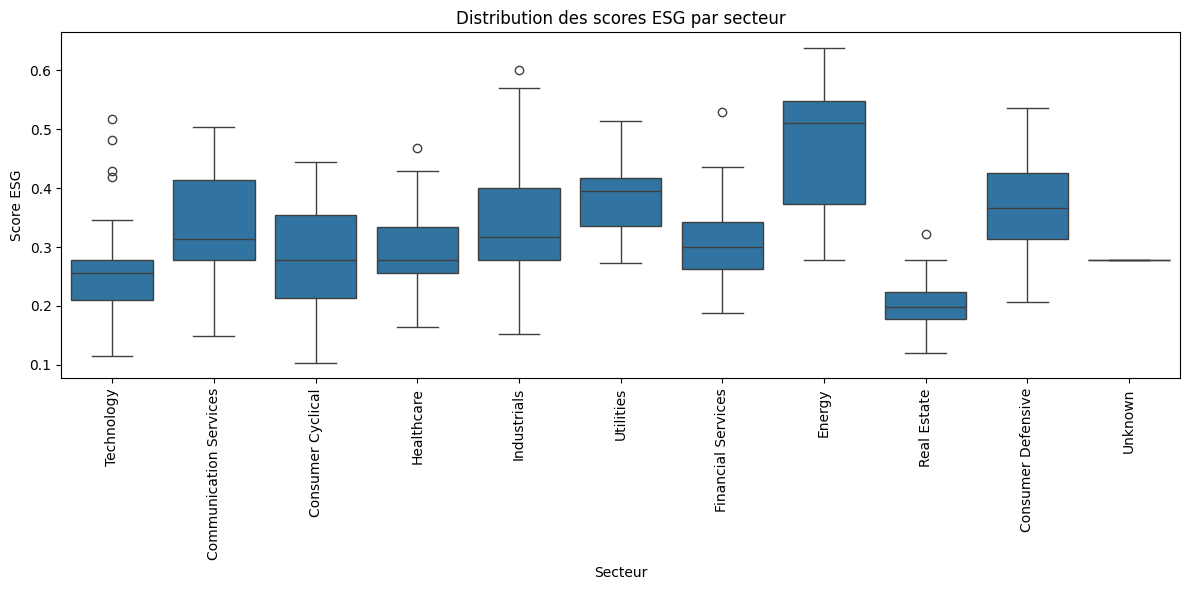

In [7]:
# Visualiser les scores ESG calcules
print(df[['Symbol', 'Name', 'Calculated ESG Score']].sort_values(by='Calculated ESG Score', ascending=False).head(10))

# Visualisation du score ESG moyen par secteur
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='Calculated ESG Score', data=df)
plt.title('Distribution des scores ESG par secteur')
plt.xlabel('Secteur')
plt.ylabel('Score ESG')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

# Sauvegarder les resultats dans un fichier CSV
df.to_csv(PROCESSED_DATA_FILE, index=False, encoding="utf-8")
print(f"Resultats sauvegardes dans {PROCESSED_DATA_FILE}")

PROCESSED_DATA_FILE: C:\Users\HP\OneDrive\Documenten\1-Projects\Professionnel\Projets pro\Modele_scoring_ESG\data\cleaned\processed_esg_data.csv
Resultats sauvegardes dans C:\Users\HP\OneDrive\Documenten\1-Projects\Professionnel\Projets pro\Modele_scoring_ESG\data\cleaned\processed_esg_data.csv
